### This notebook is for learning how to use tensorflow.keras, all of knowledge in this notebook are from the 

[InsideTensorflow:tf.keras part1](https://www.youtube.com/watch?v=UYRBHFAvLSs)  and  [InsideTensorflow:tf.keras part2](https://www.youtube.com/watch?v=uhzGTijaw8A)

also some knowledges are from TensorFlow Official guidence

### First we learn some part of Tensors in TF

In [1]:
import tensorflow as tf
import numpy as np

### TO create a tensor, we can use the function named `constant()` and `convert_to_tensor()`

In [2]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [3]:
# Also can use convert to tensor method
rank2_tensor2 = tf.convert_to_tensor(
                             [[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank2_tensor2)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


Normally we use the convert_to_tensor() for the convert, the constant is for creating a immutable tensor.

Same as the pytorch and numpy, the tensorflow has shape of the tensor

In [4]:
rank_2_tensor.shape

TensorShape([3, 2])

In [5]:
rank2_tensor2.shape

TensorShape([3, 2])

For the shape of the tensors, it's same as the the pytorch one. So, for the rank_2_tensor, we can see it has 2 brackets, the outer is a list which has 3 inner parts, so the inner been divided into 3 parts, means one batch has 3 objects. Then we look at each inner list, all of them has 2 parameters, so the innersize is 2.

Usually the tensor always has connection with the number of brackets, like `rank_2_tensor`, it has two pairs of the brackets, so it has two dimentions and the each dimention size decided by the number of units in this pair brackets. 

### Then we can convet the Tensors to numpy by `numpy.array()` or `Tensorflow.numpy()`

`Tensorflow.numpy()` is the method for all Tensors type object

In [6]:
np_array = np.array(rank_2_tensor)
np_array

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [7]:
tensorflow_numpy = rank_2_tensor.numpy()
tensorflow_numpy

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

### Now we need to learn something about the size change of Tensor

We can use `tensorflow.reshape()`, it's fast and lowcost, also it won't change the data in memory, so it's safe for converting data to the size which model layer can accept

Note that every parameter `shape` in TensorFlow, `reshape(shape=())` ,`tf.keras.layers.Input(shape=())`, **should not cover batch size**, and the shape must be a **tuple or list**, batch size will be specified in training part

In [8]:
# let's add one dimension of this tensor
# Noticed the shape is a list

rank_3_tensor = tf.reshape(rank_2_tensor, (3, 2))

In [9]:
rank_3_tensor

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)>


There is a function `tensorflow.tranpose()`, but we won't need this complex change of the tensor size now, we can learn it later

### Also the tensors have a parameter named dtype, we can use it for know the datatype of tensor, mostly the model use float32 or int8

In [10]:
rank_2_tensor.dtype

tf.float16

We can use `tensorflow.cast()` for changing tensor dtype

In [11]:
rank_2_tensor_int8 = tf.cast(rank_2_tensor, dtype=tf.int8)

In [12]:
rank_2_tensor_int8

<tf.Tensor: shape=(3, 2), dtype=int8, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int8)>

We can use `Tensor.device` for getting the running device of model

In [13]:
rank_2_tensor.device

'/job:localhost/replica:0/task:0/device:CPU:0'

### Another important thing is all Tensor has parameter named "axis", the axis usually used in `argmax()` or other methods which need specified the axis


If we have a tensor, the shape of it is "(32, 10)", we need to know, the first dimension of the tensor usually batch_size, and the axis of it is 0. So if the 10 means we have 10 probabilities of the result, we want the largest one, we need to specify the axis is 1, in the picture below, there will be a picture shows the axis in tensor

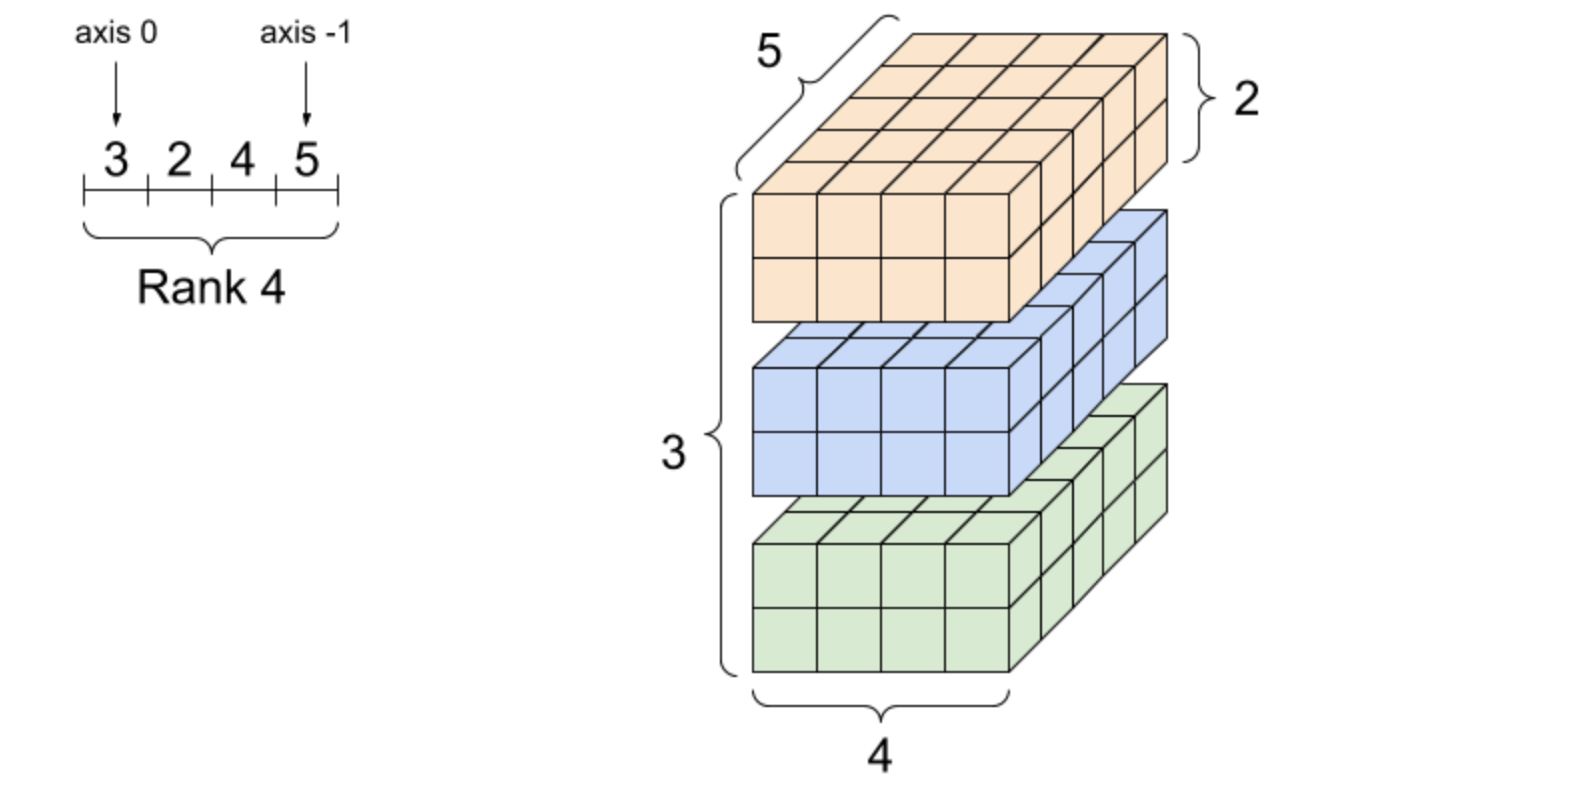

**So the first dimension is axis 0, the second is 1, the last is -1 or 3, we can use the axis as the index in list to select the dimension of a tensor**

### To make some embeddings equipment running the machine learning, we might convert the python code to computing map, let embedding equipments can running machine learning, the computing map is data and parameters of the model, but here no need to go so deeply, we can pass it

### Now time to learn the model of tensorflow, the tensorflow has the same kind of lower layer function to make us to define our own model

The modle Class need to extends the `tf.Module` like pytorch we did `nn.Module`, the method `__init__` is for init everything of the modle, the `__call__` is like the `forward` in pytorch do forward propagation

**Rememer that `tf.Moudle` not fit with tf.keras, we can use one of them at same time**

In [14]:
# This is a example to show the tf.Module, if we use keras for building the modle, no need to use that

class SimpleModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.a_variable = tf.Variable(5.0, name="train_me")
    self.non_trainable_variable = tf.Variable(5.0, trainable=False, name="do_not_train_me")
  def __call__(self, x):
    return self.a_variable * x + self.non_trainable_variable

simple_module = SimpleModule(name="simple")

simple_module(tf.constant(5.0))

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

### Now we need to use the keras to create the Moudle class of our first customize model(Traditional Method), it's most complex but detailed can do alot of customize inside

#### The `tf.keras.layers.Layer` is for creating customize layer of model, which we might not use, so slip this one

#### The `tf.keras.Model` using for creating customize model, can use it adding the layer we have created or adding the layer created by keras

**We don't need to secify the model size while using class for creating model because TensorFlow will automatically detect the input size while it get inputs**

In [2]:
from tensorflow.keras import layers 

Please remind the `Dense()` has one required parameter `unit`, it means the output dimension(or number of output), usually `Dense()` is using for make prediction visable

In [4]:
# Use the tf.keras.Model
# Create a tf.keras model class

class MyModel(tf.keras.Model):
    def __init__(self, name=None, **kwargs):
        super().__init__(**kwargs)

        self.dense1 = layers.Dense(128, activation="relu")
        self.dropout = layers.Dropout(0.5)
        self.dense2 = layers.Dense(10, activation="softmax")

    def call(self, x):
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        return x

The model class I create just an example, but we can see we need two mandatory method `__init__()`, `call()`

In the `__init__()`, we need first take all the parameters and(if we want) named the model, then feed all the parameters to `tf.Moudle` by `super()`, also if have name, the name should throw after super too. But why each layer use `self.<name> = layer` to create the objective ? Beacause **in each layer, the model need collect parameters and weight of the layer, need use specified object `self.<name>` than `<object>`, the TensorFlow can't find the object to store the data inside while training**

In the call function is like forward in pytorch, we need every layer and has a input x, x for getting every layer's output, **when we create `MyModel` objective, the input of user will automatically as the input of `call()`, so we need to specify how the data trasfer between layers**

### Then we need to use the model by define an object of the model class and put input to make a inference

In [6]:
#define the model object
mymodel = MyModel()

# predict
mymodel(<input>)

In [20]:
# See variables of the model

mymodel.variables

[<Variable path=seed_generator/seed_generator_state, shape=(2,), dtype=int64, value=[290827258         0]>]

### Now we can use `Sequantial()` for model create, it's convinence but has limitted, it can only build the traditional model, like FNN, CNN, RNN 

In [3]:
from tensorflow.keras import models, layers

**UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.**

Note while use Sequential or the functional API, we need specify the input shape by using the `layers.Input()`, the `shape` parameter must a tuple, even it's only 1 dimension 

`eg:(64, )`

In [22]:
# Method 1, all the layer defination inside the models.Sequential

sequential_model_1 = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(10, activation="softmax")
])

In [23]:
# Method 2, all the layer added handly

sequential_model_2 = models.Sequential()
sequential_model_2.add(layers.Input(shape=(64,)))
sequential_model_2.add(layers.Dense(10, activation="softmax"))

### We also have another method to create model, Functional API. This method taking balance in simply and customize

Functional API using the theority "every thing is object in python", so it's more easy to implement than `tensorflow.keras.Model`, but can has more customize than `tensorflow.keras.models.Squential()`, which means we can add different braches of the model

In [24]:
# Functional API to creat model 

inputs = tf.keras.layers.Input(shape=(64,))

x = tf.keras.layers.Dense(30, activation="relu")(inputs)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

functional_model = tf.keras.Model(inputs=inputs, outputs=outputs) 

All the model created by tf.keras can use method `summary()` to see the model information

In [25]:
sequential_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
sequential_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650 (2.54 KB)

 Trainable params: 650 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
mymodel.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
functional_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260 (8.83 KB)

 Trainable params: 2,260 (8.83 KB)

 Non-trainable params: 0 (0.00 B)

### Now we need to learn how to save model, even the model haven't been trained

We can use `tensorflow.saved_models.save()` to save the model, also can use `tensorflow.saved_models.load()` to load the saved model

But, now we are using keras model, we can use more convineient way. Just simply use `<keras_model_objective>.save()` then `tensorflow.keras.models.load_model()`

In [ ]:
# Haven't add the path because there's no trained parameter inside

mymodel.save(filepath=" ")
sequential_model_1.save(filepath=" ")
sequential_model_2.save(filepath=" ")

In [ ]:
# Haven't add the path because there's no trained parameter inside

loaded_model = tf.keras.models.load_model("file_path")

 ### Now let's learn how to training

In TensorFlow, if we used tensorflow.keras to create model, (Functional API, Sequential, tf.keras.Moudle), we can use `compile()` to specify the loss function, optimizer for traning, after that, we use `fit()` for training the model, then is the `evaluate()`, used  for testing the performance of model

Please noticed the `compile()` can specify the metrics if you want additional evaluate metrics. All the metics stored in the package `tensorflow.keras.metrics`, here we use Accurancy. The metrics we used will be metrics class, if we use method, we meed to add parameters.

Please note that the compile need specify the metrics we want to use to evaluate the performance during traing, aslo this parameter will be feed to `evaluate()` as the metrics we focusing in model testing, and the **`evaluate()` will not only focusing the metrics of loss, which will be default focusing while traning and testing, but also be focusing in metrics we specified in `compile()`**

In [15]:
mymodel.compile(
    # Define loss function
    loss=tf.keras.losses.categorical_generalized_cross_entropy,
    
    # Define optimize function
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),

    # Close the dynamic map, while increase the performance in traning, but we can make it True while we need debugging
    run_eagerly=False,

    # Add the matrics we want concern, notice the loss is default output, don't add it in the metircs
    metrics=[tf.keras.metrics.Accuracy()]
)

In [ ]:
# Use data and labels for training the model, need to add train data, train label, epochs

mymodel.fit(x=x_train, y=y_train, epochs=100, batch_size=32)

mymodel.evaluate(x=x_test, y=y_test)

The code upstairs is the basic trainning of the tensorflow.keras, However we can add some special actions in the code, such as the early stop

Early stop: While training the model, if we can't get better performance in N epochs, we stop trainning, we can choose if we want to save the best parameter of the model.

The **additional action is defined in the `callbacks` parameter of `fit()` method, the callbacks only receive list of tensorflow.keras.callbacks.Callbacks objects**, **the dictionary of these addtional action we can choose is in `tensorflow.keras.callbacks`**

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
# try the early stop, but first we need to define the early stop class

early_stop = EarlyStopping(
    # what parameter we want to monitoring, usually val_loss
    monitor="val_loss",

    # the time we wait if the montor parameter won't be better
    patience=3,

    # Set to true to set the best performance parameter we get while trainning
    restore_best_weights=True
)

In [ ]:
mymodel.fit(
    x=x_train,
    
    y=y_train,
    
    epochs=100,
    
    batch_size=32,

    # The callbacks should be stored in a list and transfer to callbacks parameter in fit() method
    callbacks=[early_stop]
)